In [93]:
import pandas as pd
data = pd.read_excel('book3.xlsx')

In [94]:
data.head()

,Date,Market,Nifty
0,2021-11-10,38.926312,18017.20
1,2021-11-09,39.661079,18044.25
2,2021-11-08,31.190007,18068.55
3,2021-11-03,26.873659,17829.20
4,2021-11-03,27.878095,17829.20


In [95]:
data['day'] = pd.to_datetime(data['Date'],'%y-%M-%D').dt.day

In [96]:
data.head()

,Date,Market,Nifty,day
0,2021-11-10,38.926312,18017.20,10
1,2021-11-09,39.661079,18044.25,9
2,2021-11-08,31.190007,18068.55,8
3,2021-11-03,26.873659,17829.20,3
4,2021-11-03,27.878095,17829.20,3


In [97]:
data['Market']

0       38.926312
1       39.661079
2       31.190007
3       26.873659
4       27.878095
          ...    
2353    43.219621
2354    52.371887
2355    64.825216
2356    64.145980
2357    60.443328
Name: Market, Length: 2358, dtype: float64

In [98]:
data['Nifty']

0       18017.20
1       18044.25
2       18068.55
3       17829.20
4       17829.20
          ...   
2353     5317.90
2354     5380.50
2355     5463.90
2356     5429.50
2357     5359.55
Name: Nifty, Length: 2358, dtype: float64

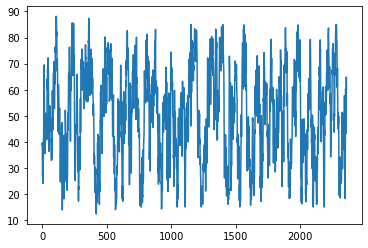

In [99]:
import matplotlib.pyplot as plt
plt.plot(data['Market'])


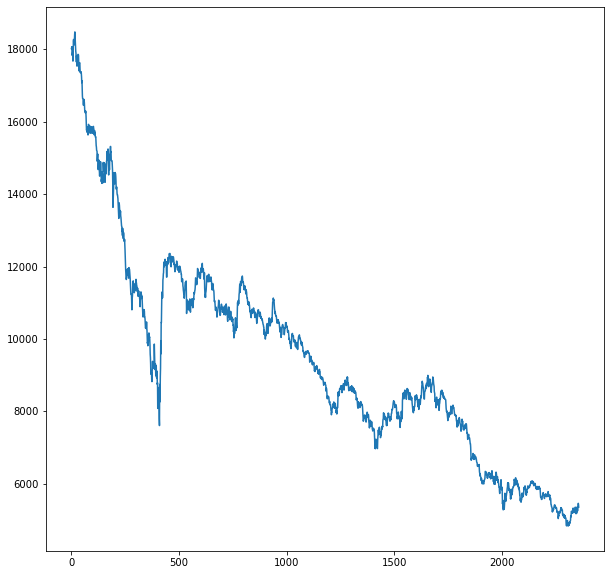

In [100]:
plt.figure(figsize = (10,10))
plt.plot(data['Nifty'])

In [102]:
data['month'] = pd.to_datetime(data['Date'],'%y-%M-%D').dt.month

In [103]:
data['year'] = pd.to_datetime(data['Date'],'%y-%M-%D').dt.year

In [104]:
data.head()

,Date,Market,Nifty,day,month,year
0,2021-11-10,38.926312,18017.20,10,11,2021
1,2021-11-09,39.661079,18044.25,9,11,2021
2,2021-11-08,31.190007,18068.55,8,11,2021
3,2021-11-03,26.873659,17829.20,3,11,2021
4,2021-11-03,27.878095,17829.20,3,11,2021


In [105]:
data['day']

0       10
1        9
2        8
3        3
4        3
        ..
2353    16
2354    15
2355    14
2356    13
2357    12
Name: day, Length: 2358, dtype: int64

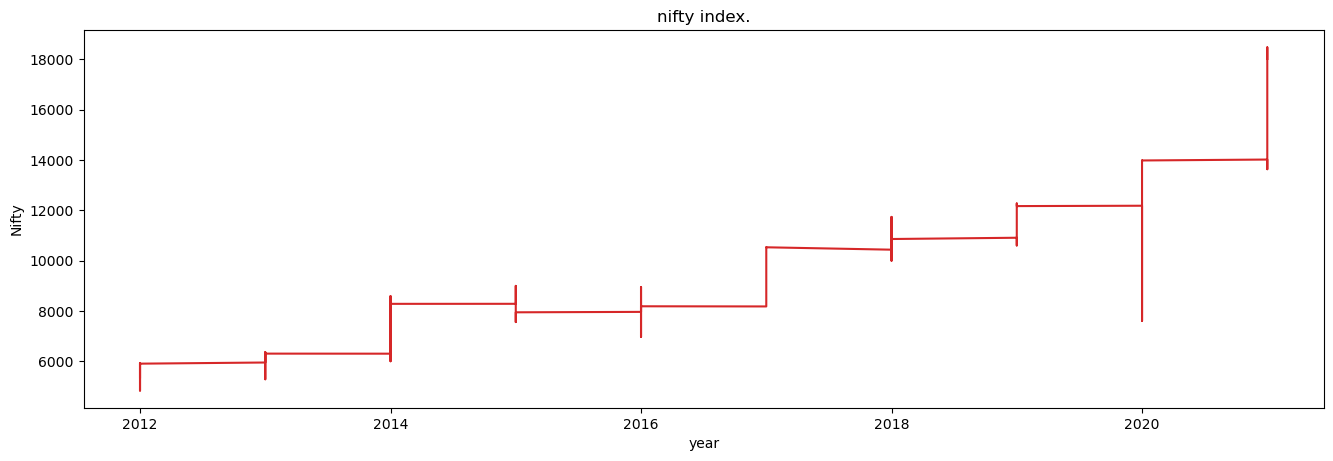

In [109]:
def plot_df(df, x, y, title="", xlabel='year', ylabel='Nifty', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(data, x=df.year, y=df.Nifty, title='nifty index.')    

In [76]:
data.head()

,Date,Market,Nifty,day,month,year
0,2021-11-10,38.926312,18017.20,10,11,2021
1,2021-11-09,39.661079,18044.25,9,11,2021
2,2021-11-08,31.190007,18068.55,8,11,2021
3,2021-11-03,26.873659,17829.20,3,11,2021
4,2021-11-03,27.878095,17829.20,3,11,2021


In [77]:
data.columns

Index(['Date', 'Market', 'Nifty', 'day', 'month', 'year'], dtype='object')

In [78]:
data.drop('Date',axis = 1 , inplace = True)

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [80]:
data.head()

,Market,Nifty,day,month,year
0,38.926312,18017.20,10,11,2021
1,39.661079,18044.25,9,11,2021
2,31.190007,18068.55,8,11,2021
3,26.873659,17829.20,3,11,2021
4,27.878095,17829.20,3,11,2021


In [81]:
X = data.iloc[:,1:]
y = data.iloc[:,0]

In [82]:
X

,Nifty,day,month,year
0,18017.20,10,11,2021
1,18044.25,9,11,2021
2,18068.55,8,11,2021
3,17829.20,3,11,2021
4,17829.20,3,11,2021
...,...,...,...,...
2353,5317.90,16,3,2012
2354,5380.50,15,3,2012
2355,5463.90,14,3,2012
2356,5429.50,13,3,2012


In [89]:
#Extreme Fear (<30)
#Fear (30—50)
#Greed (50—70)
#Extreme Greed (>70)

In [90]:
data['Labels'] = ''
for j, i in enumerate(data['Market']):
    print(i,j)
    if i < 30:
        data['Labels'].iloc[j] = 'Extreme Fear'
    if i >= 30 and i <= 50:
        data['Labels'].iloc[j] = 'Fear'
    if i > 50 and i <= 70:
        data['Labels'].iloc[j] = 'Greed'
    if i >70:
        data['Labels'].iloc[j] = 'Extreme Greed'

print(number_delay_airport)

38.92631229 0
39.66107861 1
31.19000711 2
26.87365913 3
27.87809522 4
30.73744499 5
28.26070509 6
24.06805283 7
30.24265793 8
38.94508255 9
41.22634208 10
41.37274915 11
44.36249977 12
50.44581503 13
49.81882013 14
58.3403423 15
69.52907386 16
54.72902965 17
49.46389764 18
45.76748485 19
44.71076871 20
42.35879375 21
35.52266812 22
40.85361105 23
47.70269242 24
42.89204262 25
40.2795674 26
42.24073356 27
42.58361182 28
44.055618 29
48.39046679 30
50.89760855 31
51.06065388 32
46.3093036 33
47.79703424 34
49.37652693 35
40.92484858 36
50.16348851 37
62.95089106 38
64.11352106 39
60.06319868 40
65.22394839 41
67.8886138 42
66.61909164 43
70.40438713 44
71.0213541 45
72.22384882 46
70.14167856 47
67.49511038 48
61.8291401 49
51.55756358 50
40.01527805 51
36.37817559 52
41.6117449 53
44.32834739 54
41.80206894 55
49.28717564 56
53.69212655 57
53.57295963 58
52.17460288 59
49.6156757 60
53.7794243 61
50.27679721 62
44.27954336 63
48.83853795 64
49.16368957 65
44.09200332 66
47.78487393 67
4

C:\Users\pramo\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)



59.65417055 1025
53.59563011 1026
46.34711016 1027
46.26694799 1028
48.17712389 1029
51.22797133 1030
51.35371115 1031
39.30585671 1032
35.46564463 1033
39.00331976 1034
40.2406531 1035
34.43606735 1036
37.82856775 1037
41.2831101 1038
39.15854946 1039
30.29661062 1040
29.62915423 1041
38.23119239 1042
32.88621712 1043
22.50047285 1044
15.06444236 1045
15.0 1046
15.28827172 1047
17.951994 1048
23.51286649 1049
22.13104986 1050
18.12353151 1051
25.82226807 1052
36.05405222 1053
43.57301245 1054
49.23454441 1055
45.11751303 1056
38.46183731 1057
44.21471947 1058
47.15639224 1059
43.87230011 1060
43.07415054 1061
47.57352685 1062
52.80596337 1063
49.56092173 1064
50.01135245 1065
50.36851164 1066
51.88686711 1067
45.17554103 1068
38.68156588 1069
45.4209156 1070
48.99220627 1071
49.78554652 1072
48.60162132 1073
51.89743173 1074
55.70622861 1075
57.10211281 1076
58.8723012 1077
49.24282671 1078
41.34256558 1079
37.94846676 1080
36.84704221 1081
35.88847202 1082
34.50067528 1083
43.035977

22.86012001 1857
28.79184747 1858
33.0054138 1859
34.57245543 1860
33.9718753 1861
35.42428079 1862
42.92337973 1863
49.61007028 1864
48.05368154 1865
46.12115921 1866
51.15417364 1867
51.89710938 1868
39.05010123 1869
32.31245913 1870
45.15206722 1871
61.42304187 1872
69.30899097 1873
67.36709086 1874
60.37010184 1875
53.68253141 1876
59.48034688 1877
69.70843925 1878
68.74127994 1879
69.94113897 1880
75.0087412 1881
77.79613112 1882
80.85381671 1883
83.7899467 1884
81.33464392 1885
78.22051251 1886
73.45055406 1887
73.46812431 1888
75.83182233 1889
69.4762845 1890
66.43575165 1891
66.88983571 1892
68.65415475 1893
71.68873454 1894
74.56307526 1895
71.47722238 1896
57.16956877 1897
53.94584691 1898
58.57822403 1899
48.58128751 1900
40.89984367 1901
39.21143943 1902
34.98020096 1903
33.87410609 1904
39.41402953 1905
33.85479399 1906
28.7616058 1907
22.80272189 1908
26.44192403 1909
32.33662169 1910
26.46660976 1911
29.30536154 1912
25.64869344 1913
18.31186851 1914
21.07640595 1915
21.

NameError: name 'number_delay_airport' is not defined

<AxesSubplot:xlabel='Labels', ylabel='count'>

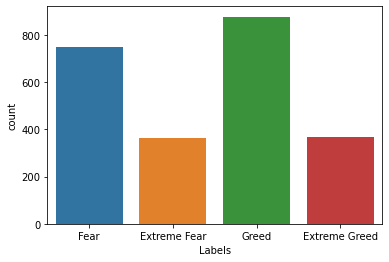

In [91]:
sns.countplot(x = "Labels" , data = data)

In [31]:
data.head()

,Market,Nifty,day,month,year,Labels
0,38.926312,18017.20,10,11,2021,Fear
1,39.661079,18044.25,9,11,2021,Fear
2,31.190007,18068.55,8,11,2021,Fear
3,26.873659,17829.20,3,11,2021,Extreme Fear
4,27.878095,17829.20,3,11,2021,Extreme Fear


In [32]:
data.head(30)

,Market,Nifty,day,month,year,Labels
0,38.926312,18017.20,10,11,2021,Fear
1,39.661079,18044.25,9,11,2021,Fear
2,31.190007,18068.55,8,11,2021,Fear
3,26.873659,17829.20,3,11,2021,Extreme Fear
4,27.878095,17829.20,3,11,2021,Extreme Fear
5,30.737445,17888.95,2,11,2021,Fear
6,28.260705,17929.65,1,11,2021,Extreme Fear
7,24.068053,17671.65,29,10,2021,Extreme Fear
8,30.242658,17857.25,28,10,2021,Fear
9,38.945083,18210.95,27,10,2021,Fear


In [33]:
newlabel = pd.get_dummies(data['Labels'],drop_first=True)

In [34]:
newlabel

,Extreme Greed,Fear,Greed
0,0,1,0
1,0,1,0
2,0,1,0
3,0,0,0
4,0,0,0
...,...,...,...
2353,0,1,0
2354,0,0,1
2355,0,0,1
2356,0,0,1


In [35]:
df = pd.concat([data,newlabel],axis = 1)

In [36]:
df.head()

,Market,Nifty,day,month,year,Labels,Extreme Greed,Fear,Greed
0,38.926312,18017.20,10,11,2021,Fear,0,1,0
1,39.661079,18044.25,9,11,2021,Fear,0,1,0
2,31.190007,18068.55,8,11,2021,Fear,0,1,0
3,26.873659,17829.20,3,11,2021,Extreme Fear,0,0,0
4,27.878095,17829.20,3,11,2021,Extreme Fear,0,0,0


In [37]:
df.drop(['Labels'],axis = 1,inplace = True)

In [38]:
df.head()

,Market,Nifty,day,month,year,Extreme Greed,Fear,Greed
0,38.926312,18017.20,10,11,2021,0,1,0
1,39.661079,18044.25,9,11,2021,0,1,0
2,31.190007,18068.55,8,11,2021,0,1,0
3,26.873659,17829.20,3,11,2021,0,0,0
4,27.878095,17829.20,3,11,2021,0,0,0


In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,classification_report,precision_score,recall_score

In [40]:
X = df.iloc[:,0:5]
y = df.iloc[:,5:]

In [41]:
y

,Extreme Greed,Fear,Greed
0,0,1,0
1,0,1,0
2,0,1,0
3,0,0,0
4,0,0,0
...,...,...,...
2353,0,1,0
2354,0,0,1
2355,0,0,1
2356,0,0,1


In [42]:
X

,Market,Nifty,day,month,year
0,38.926312,18017.20,10,11,2021
1,39.661079,18044.25,9,11,2021
2,31.190007,18068.55,8,11,2021
3,26.873659,17829.20,3,11,2021
4,27.878095,17829.20,3,11,2021
...,...,...,...,...,...
2353,43.219621,5317.90,16,3,2012
2354,52.371887,5380.50,15,3,2012
2355,64.825216,5463.90,14,3,2012
2356,64.145980,5429.50,13,3,2012


In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 10)

In [44]:
X_train

,Market,Nifty,day,month,year
2030,41.944666,6030.80,15,7,2013
1743,42.115667,7991.70,27,10,2014
881,62.069451,10614.35,24,4,2018
242,85.405515,12938.25,18,11,2020
1489,54.822199,8040.20,4,11,2015
...,...,...,...,...,...
2009,22.911999,5471.75,23,8,2013
1180,81.021213,8740.95,3,2,2017
1344,83.264076,8273.05,8,6,2016
527,70.242507,11359.90,1,10,2019


In [45]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_predict = rf.predict(X_test)

In [46]:
accuracy_score(y_test,y_predict)

0.998587570621469

In [47]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       115
           1       1.00      1.00      1.00       225
           2       1.00      1.00      1.00       260

   micro avg       1.00      1.00      1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600
 samples avg       0.85      0.85      0.85       600



C:\Users\pramo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pramo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [173]:
print("Precision Score : ",precision_score(y_test,y_predict,pos_label='positive',average='micro'))
print("Recall Score :" , recall_score(y_test, y_predict, pos_label='positive',average='micro') )

Precision Score :  0.9983361064891847
Recall Score : 1.0


C:\Users\pramo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


In [172]:
f1_score(y_test,y_predict,average='micro')

0.9991673605328892

In [174]:
X

,Market,Nifty,day,month,year
0,38.926312,18017.20,10,11,2021
1,39.661079,18044.25,9,11,2021
2,31.190007,18068.55,8,11,2021
3,26.873659,17829.20,3,11,2021
4,27.878095,17829.20,3,11,2021
...,...,...,...,...,...
2353,43.219621,5317.90,16,3,2012
2354,52.371887,5380.50,15,3,2012
2355,64.825216,5463.90,14,3,2012
2356,64.145980,5429.50,13,3,2012


In [177]:
rf.predict([[42.13,17536.25,25,11,2021]])

array([[0, 1, 0]], dtype=uint8)